In [4]:
                                                                             # Necessary Imports

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs #artificial dataset 
from sklearn.preprocessing import StandardScaler

In [5]:
# Data creation (Artifical Dataset) #education 
centers = [[1, 1], [-1, -1], [1, -1]]  
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)  # generate sample blobs

X = StandardScaler().fit_transform(X)

In [15]:
# DBSCAN
db = DBSCAN(eps=0.28, min_samples=10).fit(X)

# we are calculating these for showcasing in diagram
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  # creating an array of true and false as the same size as db.labels
core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True
labels = db.labels_  # similar to the model.fit() method, it gives the labels of the clustered data

In [16]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the DBSCAN algorithm
n_noise_ = list(labels).count(-1)  # calculating the number of clusters

In [17]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

"""Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class."""

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise points: 27
Homogeneity: 0.941


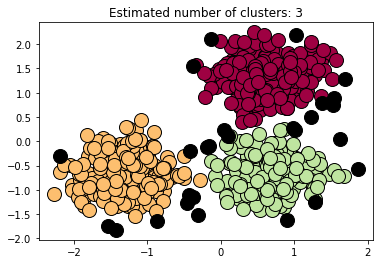

In [18]:
# Plot result
import matplotlib.pyplot as plt

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)   # assigning class members for each class
    

    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    

    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [20]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [21]:
purity_score(labels_true, labels)

0.9733333333333334

In [9]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Silhouette Coefficient: 0.626
